# Stock Exchange Data
This dataset consists of stock exchange data since 1965 for several indexes. It contains the daily stock prices along with the volume traded each day.

## Data Dictionary
| Column            | Explanation                                                                                             |
| ----------------- | ------------------------------------------------------------------------------------------------------- |
| Index             | Ticker symbol for indexes
| Date              | Data of observation
| Open              | Opening price
| High              | Highest price during trading day
| Low               | Lowest price during trading day
| Close             | Close price
| Adj Close         | Close price adjusted for stock splits and dividends
| Volume            | Number of shares traded during trading day
| CloseUSD          | Close price in terms of USD

## Objectives:

- **Explore**: Identify the index with the *highest average annual return* 
- **Visualize**: Visualize a *30-day moving average* for an index of choice 
- **Analyze**: *Compare the volatilities* of the indexes in the dataset 


## Step 1. Load and Inspect the Data

1. Import Libraries

In [33]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

2. Load Data

In [34]:
# Load data
stock = pd.read_csv('data\stock_data.csv')

3. Inspect the Data

We'll check the overview of the data inspecting the datatypes, distribution of column values, shape of dataset, for any missing values

In [35]:
summary = {
    'Number of Records': stock.shape[0],
    'Number of Columns': stock.shape[1],
    'Missing Values': stock.isnull().sum()
}
print(summary)

{'Number of Records': 104224, 'Number of Columns': 9, 'Missing Values': Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64}


In [36]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [37]:
# Statistical summary
stock.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


The dataset looks fairly clean so far, there are no missing values, and apart from Date column, all other columns have the correct data types representation. Let's visualize the column distributions to better understand what our values look like and see if there exists outliers in our data.

In [54]:
# # Plot histogram
# def plot_numerical_distributions(df, plot_type='hist', bins=20, ncols=3):
#     # Select only numerical columns
#     numerical_columns = df.select_dtypes(include=['number']).columns
    
#     # Calculate number of rows needed for the subplots grid
#     nrows = int(np.ceil(len(numerical_columns) / ncols))  # Round up to next integer
    
#     # Set the size of the plot
#     plt.figure(figsize=(ncols * 5, nrows * 4))  # Adjust figure size dynamically based on columns and rows
    
#     # Plot distributions for each numerical column
#     for i, col in enumerate(numerical_columns, 1):
#         plt.subplot(nrows, ncols, i)  # Positioning for subplots
#         if plot_type == 'hist':
#             sns.histplot(df[col], kde=True, bins=bins, color='skyblue', edgecolor='black')
#             plt.title(f"Histogram of {col}")
#         elif plot_type == 'box':
#             sns.boxplot(data=df, x=col, color='lightblue')
#             plt.title(f"Boxplot of {col}")
    
#     # Adjust layout and show plot
#     plt.tight_layout()
#     plt.show()

In [55]:
# def plot_numerical_distributions(df, plot_type='box', bins=20, ncols=4):
#     numerical_columns = df.select_dtypes(include=['number']).columns
#     # Calculate number of rows needed for the subplots grid
#     nrows = int(np.ceil(len(numerical_columns) / ncols))  # Round up to next integer
    
#     # Set the size of the plot
#     plt.figure(figsize=(ncols * 5, nrows * 4))  # Adjust figure size dynamically based on columns and rows
    
#     # Plot distributions for each numerical column
#     for i, col in enumerate(numerical_columns, 1):
#         plt.subplot(nrows, ncols, i)  # Positioning for subplots
#         if plot_type == 'hist':
#             sns.histplot(df[col], kde=True, bins=bins, color='skyblue', edgecolor='black')
#             plt.title(f"Histogram of {col}")
#         elif plot_type == 'box':
#             sns.boxplot(data=df, x=col, color='lightblue')
#             plt.title(f"Boxplot of {col}")
    
#     # Adjust layout and show plot
#     plt.tight_layout()
#     plt.show()

In [56]:
# # Plots distributions
# plot_numerical_distributions(stock, 'hist')
# plot_numerical_distributions(stock, 'box')

The dataset appears to be quite skewed and there are outliers in every column. We'll keep that in mind for the later steps. For now let's inspect our Index column which is our only categorical column.

In [57]:
# print(stock['Index'].unique())
# print()
# print(f'Number of Unique Stock Indexes:',len(stock['Index'].unique()))
# print()
# print(stock['Index'].value_counts())


4. Convert Date Column

In [58]:
stock['Date'] = pd.to_datetime(stock['Date'])
# stock.info()

## Step 2: Explore - Identify the Index with the Highest Average Annual Return

1. Calculate Daily Returns

In [45]:
# Group by "Index" and sort by "Date" to calculate daily returns.
stock.sort_values(by=['Index', 'Date'], inplace=True)
stock['Daily_Return'] = stock.groupby('Index')['Close'].pct_change()

2. Calculate Annual Returns and their Means:

In [46]:
# Extract the year from the "Date" column to facilitate annual calculations
stock['Year'] = stock['Date'].dt.year
# Grouping by both "Index" and "Year," and then taking the mean of daily returns.
annual_returns = stock.groupby(['Index', 'Year'])['Daily_Return'].mean()
# Mean annual return across years for each index
avg_annual_return = annual_returns.groupby('Index').mean()

In [47]:
# Index with the highest average annual return
highest_avg_return_index = avg_annual_return.idxmax()
highest_avg_return_value = avg_annual_return.max()
print(f"The index with the highest average annual return is {highest_avg_return_index} with a return of {highest_avg_return_value:.2%}")


The index with the highest average annual return is NSEI with a return of 0.07%


## Step 3: Visualize - 30-Day Moving Average for an Index

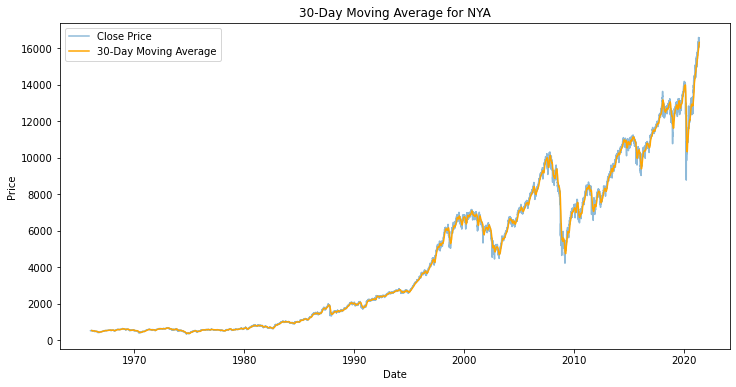

In [53]:
# Choose an Index
chosen_index = 'NYA'
selected_stock = stock[stock['Index'] == chosen_index].copy()
# Calculate the 30-Day Moving Average
selected_stock['30_day_MA'] = selected_stock['Close'].rolling(window=30).mean()

# Plot the Moving Average
plt.figure(figsize=(12, 6))
plt.plot(selected_stock['Date'], selected_stock['Close'], label='Close Price', alpha=0.5)
plt.plot(selected_stock['Date'], selected_stock['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.title(f'30-Day Moving Average for {chosen_index}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Step 4: Analyze - Compare Volatilities of the Indexes

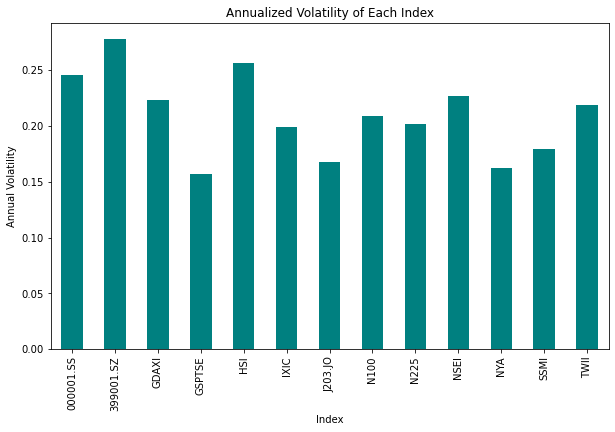

In [51]:
# Calculate daily volatility - stdev of daily returns per index
volatility = stock.groupby('Index')['Daily_Return'].std()
# Annualize volatility
annual_volatility = volatility * np.sqrt(252)

# Plot volatility comparison
annual_volatility.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Annualized Volatility of Each Index')
plt.xlabel('Index')
plt.ylabel('Annual Volatility')
plt.show()

In [52]:
stock.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily_Return,Year
35129,000001.SS,1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0,191.849766,NaN,1997
35130,000001.SS,1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0,184.099688,-0.040397,1997
35131,000001.SS,1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0,185.494727,0.007578,1997
35132,000001.SS,1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0,175.491035,-0.053930,1997
35133,000001.SS,1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0,177.546563,0.011713,1997
